#### Simulation: Different spatial patterns to understand behavior of TDA adjacency method

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from geodata import generate_grid_dataframe,calculate_moran_i

from adjacency_simplex import AdjacencySimplex  # Import the class
from plot_utills import plot_simplicial_complex_gif
from calculate_tda_summaries import compute_persistence

In [2]:
NUM_OF_ITERATIONS = 100
GRID_SIZE = 10

# Set the random seed
np.random.seed(0)
RANDOM_SEED_LIST = np.random.randint(0, 1000, NUM_OF_ITERATIONS)

# create a empty df to store the results
results_df = pd.DataFrame(columns=['Iteration', 'Random Seed','Autocorrlation', 'Moran I', 'Filter Method', 'Number of H0 Points', 'TL', 'AL', 'TML', 'AML'])


for iter in range(NUM_OF_ITERATIONS):
    # print(f"Iteration: {iter}")
    RANDOM_SEED = RANDOM_SEED_LIST[iter]

    gdf_none = generate_grid_dataframe(GRID_SIZE, autocorrelation="none", random_seed=RANDOM_SEED)        # No spatial correlation
    gdf_positive = generate_grid_dataframe(GRID_SIZE, autocorrelation="positive", random_seed=RANDOM_SEED) 

    # Calculate Moran’s I
    moran_none = calculate_moran_i(gdf_none, GRID_SIZE)
    moran_positive = calculate_moran_i(gdf_positive, GRID_SIZE)

    for gdf in [gdf_none, gdf_positive]:
        for filter_method in ['up', 'down']:
        
            # Initialize the AdjacencySimplex class
            adj_simplex = AdjacencySimplex(gdf, 'Value', threshold = None, filter_method = filter_method)

            # Filter the GeoDataFrame
            filtered_df,gdf_id = adj_simplex.filter_sort_gdf()

            # Calculate the adjacent countries
            adj_simplex.calculate_adjacent_countries()

            # Form the simplicial complex
            simplex = adj_simplex.form_simplicial_complex()

            total_h0_points, tl, al, tml, aml = compute_persistence(simplex,filtered_df, 'Value')

            if filter_method == 'up' and gdf is gdf_none:
                new_row = pd.DataFrame([{'Iteration': iter, 'Random Seed': RANDOM_SEED, 'Autocorrlation': 'none', 'Moran I': moran_none, 'Filter Method': filter_method, 'Number of H0 Points': total_h0_points, 'TL': tl, 'AL': al, 'TML': tml, 'AML': aml}])
                results_df = pd.concat([results_df, new_row], ignore_index=True)
            elif filter_method == 'up' and gdf is gdf_positive:
                new_row = pd.DataFrame([{'Iteration': iter, 'Random Seed': RANDOM_SEED, 'Autocorrlation': 'positive', 'Moran I': moran_positive, 'Filter Method': filter_method, 'Number of H0 Points': total_h0_points, 'TL': tl, 'AL': al, 'TML': tml, 'AML': aml}])
                results_df = pd.concat([results_df, new_row], ignore_index=True)
            elif filter_method == 'down' and gdf is gdf_none:
                new_row = pd.DataFrame([{'Iteration': iter, 'Random Seed': RANDOM_SEED, 'Autocorrlation': 'none', 'Moran I': moran_none, 'Filter Method': filter_method, 'Number of H0 Points': total_h0_points, 'TL': tl, 'AL': al, 'TML': tml, 'AML': aml}])
                results_df = pd.concat([results_df, new_row], ignore_index=True)
            elif filter_method == 'down' and gdf is gdf_positive:
                new_row = pd.DataFrame([{'Iteration': iter, 'Random Seed': RANDOM_SEED, 'Autocorrlation': 'positive', 'Moran I': moran_positive, 'Filter Method': filter_method, 'Number of H0 Points': total_h0_points, 'TL': tl, 'AL': al, 'TML': tml, 'AML': aml}])
                results_df = pd.concat([results_df, new_row], ignore_index=True)

print("Simulation completed for all iterations")


/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_50317/734075813.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


Simulation completed for all iterations


Moran I

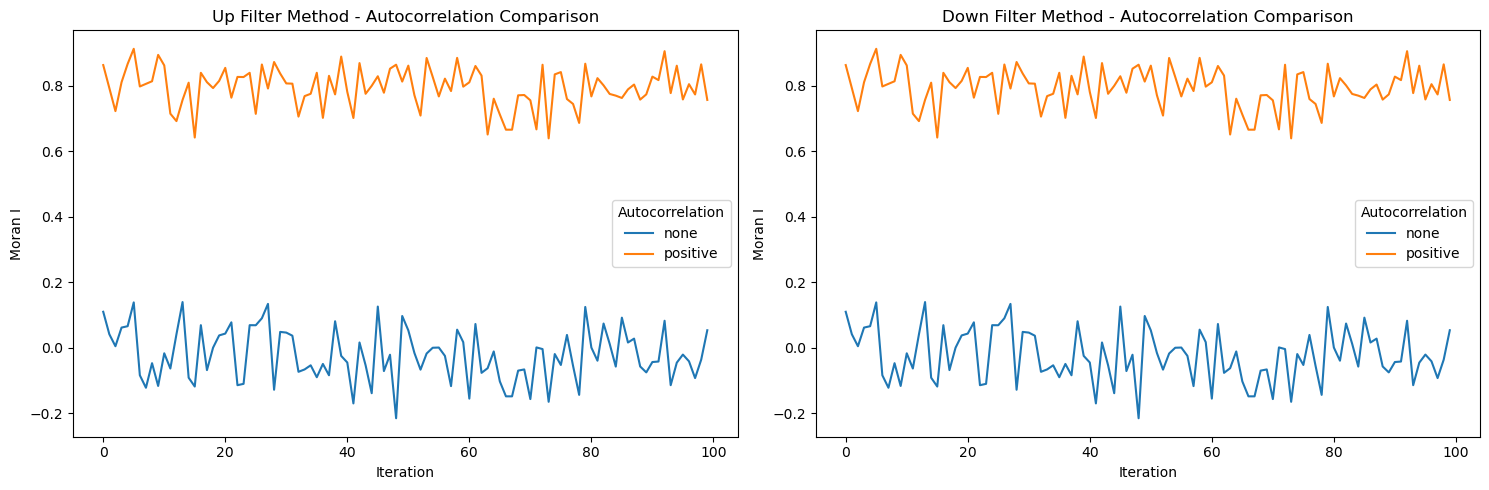

In [3]:
import matplotlib.pyplot as plt

# Ensure results_df is defined in the environment before running this
if 'results_df' not in locals():
    raise NameError("The dataframe 'results_df' is not defined. Please ensure it is loaded.")

# Define filter methods
filter_methods = ['up', 'down']
titles = ["Up Filter Method", "Down Filter Method"]

# Create subplots for filter method comparison, then group by autocorrelation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, filter_method in enumerate(filter_methods):
    # Step 1: Filter the dataframe by filter method (up/down)
    filtered_df = results_df[results_df['Filter Method'] == filter_method]
    
    # Step 2: Group by autocorrelation, then by iteration, and compute mean TL
    grouped_df = filtered_df.groupby(['Autocorrlation', 'Iteration'])['Moran I'].mean().unstack(0)
    
    # Step 3: Plot the grouped data
    grouped_df.plot(ax=axes[i])
    
    # Set plot titles and labels
    axes[i].set_title(f"{titles[i]} - Autocorrelation Comparison")
    axes[i].set_xlabel("Iteration")
    axes[i].set_ylabel("Moran I")
    axes[i].legend(title="Autocorrelation")

# Adjust layout for better clarity
plt.tight_layout()
plt.show()

Total Lifespan(TL)

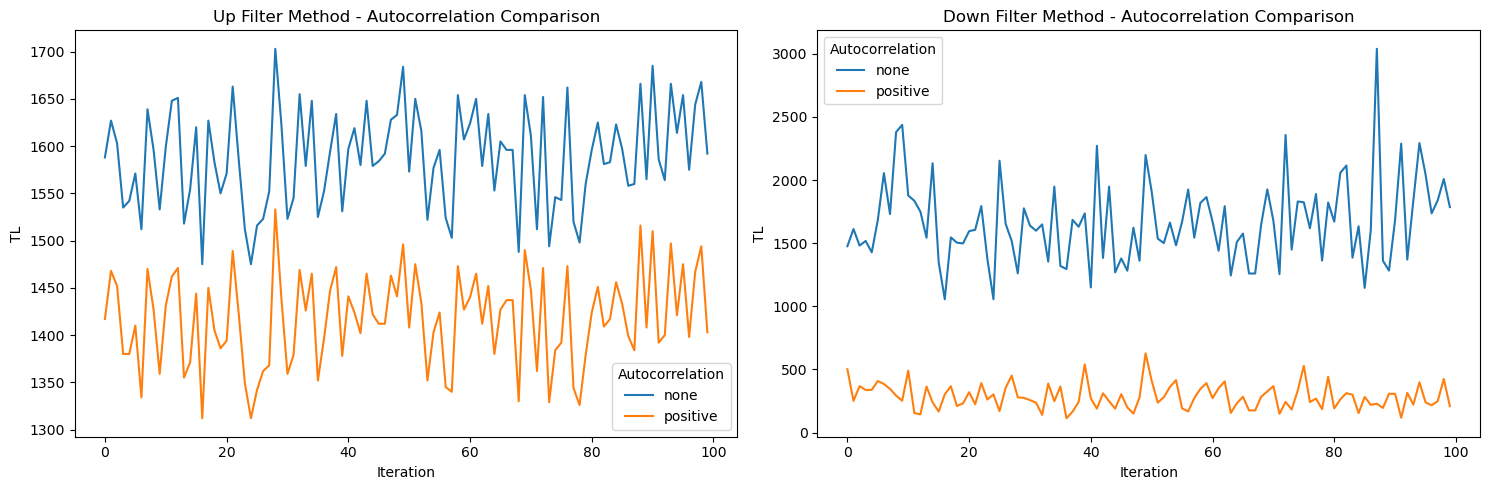

In [4]:
import matplotlib.pyplot as plt

# Ensure results_df is defined in the environment before running this
if 'results_df' not in locals():
    raise NameError("The dataframe 'results_df' is not defined. Please ensure it is loaded.")

# Define filter methods
filter_methods = ['up', 'down']
titles = ["Up Filter Method", "Down Filter Method"]

# Create subplots for filter method comparison, then group by autocorrelation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, filter_method in enumerate(filter_methods):
    # Step 1: Filter the dataframe by filter method (up/down)
    filtered_df = results_df[results_df['Filter Method'] == filter_method]
    
    # Step 2: Group by autocorrelation, then by iteration, and compute mean TL
    grouped_df = filtered_df.groupby(['Autocorrlation', 'Iteration'])['TL'].mean().unstack(0)
    
    # Step 3: Plot the grouped data
    grouped_df.plot(ax=axes[i])
    
    # Set plot titles and labels
    axes[i].set_title(f"{titles[i]} - Autocorrelation Comparison")
    axes[i].set_xlabel("Iteration")
    axes[i].set_ylabel("TL")
    axes[i].legend(title="Autocorrelation")

# Adjust layout for better clarity
plt.tight_layout()
plt.show()

Total MId Life(TML)

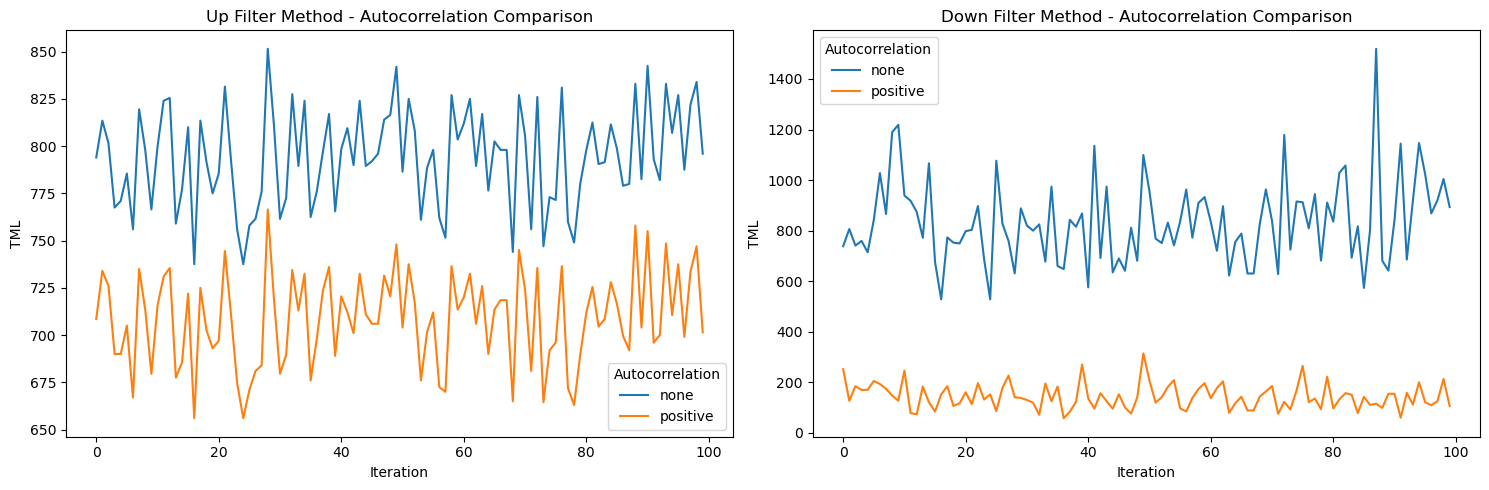

In [5]:
import matplotlib.pyplot as plt

# Ensure results_df is defined in the environment before running this
if 'results_df' not in locals():
    raise NameError("The dataframe 'results_df' is not defined. Please ensure it is loaded.")

# Define filter methods
filter_methods = ['up', 'down']
titles = ["Up Filter Method", "Down Filter Method"]

# Create subplots for filter method comparison, then group by autocorrelation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, filter_method in enumerate(filter_methods):
    # Step 1: Filter the dataframe by filter method (up/down)
    filtered_df = results_df[results_df['Filter Method'] == filter_method]
    
    # Step 2: Group by autocorrelation, then by iteration, and compute mean TL
    grouped_df = filtered_df.groupby(['Autocorrlation', 'Iteration'])['TML'].mean().unstack(0)
    
    # Step 3: Plot the grouped data
    grouped_df.plot(ax=axes[i])
    
    # Set plot titles and labels
    axes[i].set_title(f"{titles[i]} - Autocorrelation Comparison")
    axes[i].set_xlabel("Iteration")
    axes[i].set_ylabel("TML")
    axes[i].legend(title="Autocorrelation")

# Adjust layout for better clarity
plt.tight_layout()
plt.show()


Average Lifespan(AL)

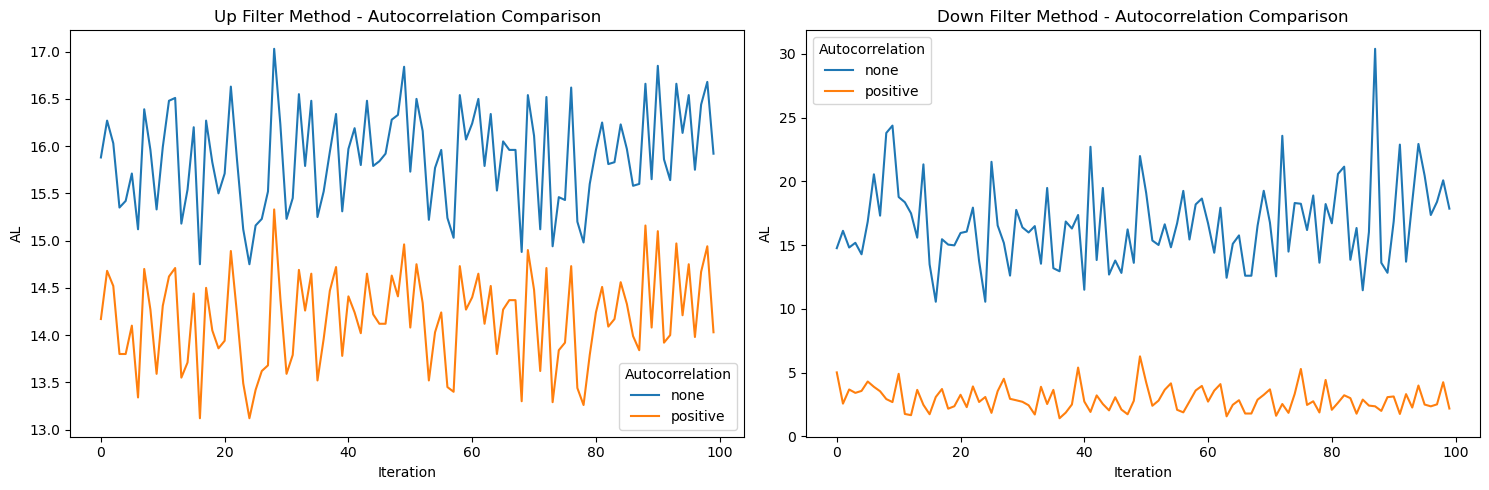

In [6]:
import matplotlib.pyplot as plt

# Ensure results_df is defined in the environment before running this
if 'results_df' not in locals():
    raise NameError("The dataframe 'results_df' is not defined. Please ensure it is loaded.")

# Define filter methods
filter_methods = ['up', 'down']
titles = ["Up Filter Method", "Down Filter Method"]

# Create subplots for filter method comparison, then group by autocorrelation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, filter_method in enumerate(filter_methods):
    # Step 1: Filter the dataframe by filter method (up/down)
    filtered_df = results_df[results_df['Filter Method'] == filter_method]
    
    # Step 2: Group by autocorrelation, then by iteration, and compute mean TL
    grouped_df = filtered_df.groupby(['Autocorrlation', 'Iteration'])['AL'].mean().unstack(0)
    
    # Step 3: Plot the grouped data
    grouped_df.plot(ax=axes[i])
    
    # Set plot titles and labels
    axes[i].set_title(f"{titles[i]} - Autocorrelation Comparison")
    axes[i].set_xlabel("Iteration")
    axes[i].set_ylabel("AL")
    axes[i].legend(title="Autocorrelation")

# Adjust layout for better clarity
plt.tight_layout()
plt.show()


Average Mid Life(AML)

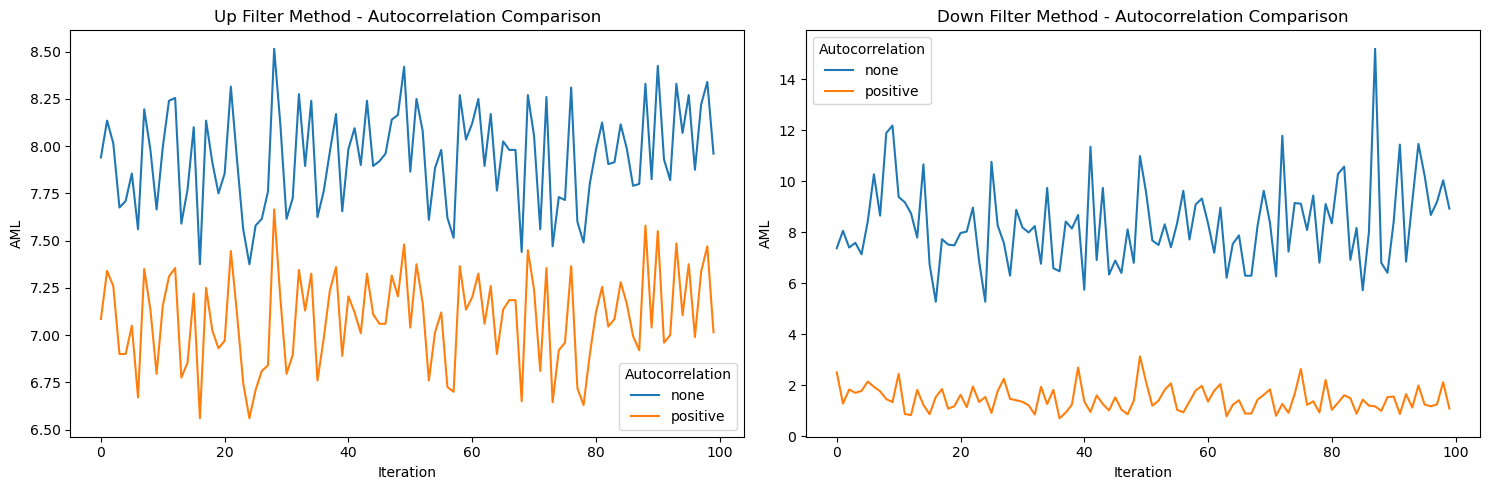

In [7]:
import matplotlib.pyplot as plt

# Ensure results_df is defined in the environment before running this
if 'results_df' not in locals():
    raise NameError("The dataframe 'results_df' is not defined. Please ensure it is loaded.")

# Define filter methods
filter_methods = ['up', 'down']
titles = ["Up Filter Method", "Down Filter Method"]

# Create subplots for filter method comparison, then group by autocorrelation
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, filter_method in enumerate(filter_methods):
    # Step 1: Filter the dataframe by filter method (up/down)
    filtered_df = results_df[results_df['Filter Method'] == filter_method]
    
    # Step 2: Group by autocorrelation, then by iteration, and compute mean TL
    grouped_df = filtered_df.groupby(['Autocorrlation', 'Iteration'])['AML'].mean().unstack(0)
    
    # Step 3: Plot the grouped data
    grouped_df.plot(ax=axes[i])
    
    # Set plot titles and labels
    axes[i].set_title(f"{titles[i]} - Autocorrelation Comparison")
    axes[i].set_xlabel("Iteration")
    axes[i].set_ylabel("AML")
    axes[i].legend(title="Autocorrelation")

# Adjust layout for better clarity
plt.tight_layout()
plt.show()
